In [8]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

http://statsmodels.sourceforge.net/devel/nonparametric.html
    
This includes：
- kernel density estimation for univariate and multivariate data
- kernel regression 
- locally weighted scatterplot smoothing (lowess)

In [2]:
df = pd.read_csv('/Users/chengjun/Downloads/Numsandnegrate1.csv', delimiter=',')

In [3]:
df[:5]

,Unnamed: 0,Nums,Negrate
0,1,1498,0.264352
1,1112,10,0.100000
2,2223,15,0.400000
3,3334,34,0.205882
4,4445,1,0.000000


In [4]:
len(df)

7700

数据中的“Nums”代表新闻的评论数，“Negrate”代表新闻的负面评论比率，需要对这两列数据进行非参数回归。烦请将检验代码及检验结果发给我！

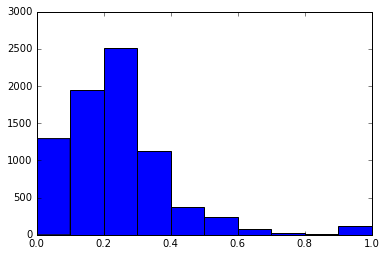

In [31]:
plt.hist(df.Negrate)
plt.show()

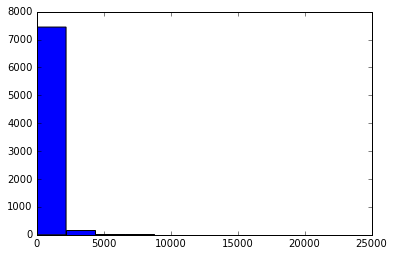

In [27]:
plt.hist(df.Nums)
plt.show()

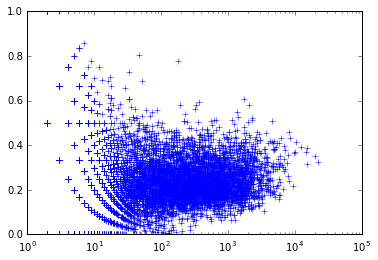

In [35]:
plt.plot( df.Nums, df.Negrate, '+')
plt.xscale('log')
plt.show()


In [36]:
y, x = df.Negrate, np.log(df.Nums)


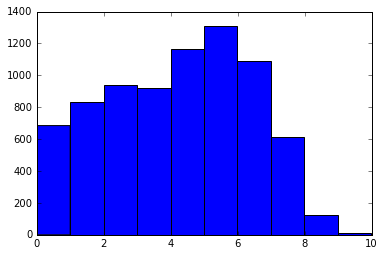

In [37]:
plt.hist(x)
plt.show()

In [38]:
from statsmodels.nonparametric.kernel_regression import KernelReg

y, x = df.Negrate, np.log(df.Nums)
kr = KernelReg(y, x, 'c')

In [75]:
def linearBin(x,y):
    a=[]
    q=sorted(zip(map(int,x),y))
    tag = ''
    d=[]
    for i in q:
        x1,y1 = i
        if x1 == tag: 
            d.append(y1)
        else:   
            if tag:   
                a.append([tag,np.mean(d)])
            tag = x1
            d = []
    a.append([tag,np.mean(d)])
    nx,ny = np.array(a).T
    return nx,ny

In [76]:
x_bin, y_bin = linearBin(x, y)

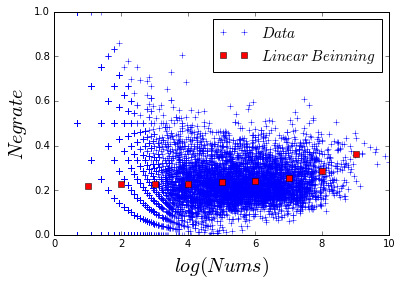

In [78]:
plt.plot(x, y, '+', label = '$Data$')
plt.plot(x_bin, y_bin, 'rs', label = '$Linear\;Beinning$')
plt.ylabel('$Negrate$', fontsize = 20)
plt.xlabel('$log(Nums)$', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

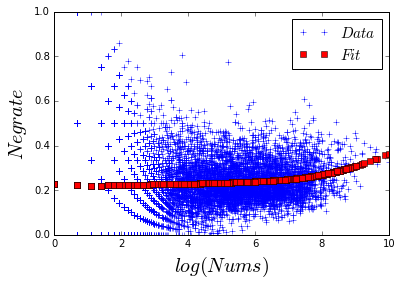

In [73]:
plt.plot(x, y, '+', label = '$Data$')
y_pred, y_std = kr.fit(x)
plt.plot(x, y_pred, 'rs', label = '$Fit$')
plt.ylabel('$Negrate$', fontsize = 20)
plt.xlabel('$log(Nums)$', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [45]:
help(kr)

Help on KernelReg in module statsmodels.nonparametric.kernel_regression object:

class KernelReg(statsmodels.nonparametric._kernel_base.GenericKDE)
 |  Nonparametric kernel regression class.
 |  
 |  Calculates the conditional mean ``E[y|X]`` where ``y = g(X) + e``.
 |  Note that the "local constant" type of regression provided here is also
 |  known as Nadaraya-Watson kernel regression; "local linear" is an extension
 |  of that which suffers less from bias issues at the edge of the support.
 |  
 |  Parameters
 |  ----------
 |  endog: list with one element which is array_like
 |      This is the dependent variable.
 |  exog: list
 |      The training data for the independent variable(s)
 |      Each element in the list is a separate variable
 |  var_type: str
 |      The type of the variables, one character per variable:
 |  
 |          - c: continuous
 |          - u: unordered (discrete)
 |          - o: ordered (discrete)
 |  
 |  reg_type: {'lc', 'll'}, optional
 |      Type of

In [47]:
print(kr.bw) # The bandwidth parameters.

[ 0.99474993]


In [59]:
kr.sig_test([0], nboot=50, nested_res=25)

'***'

In [53]:
kr.r_squared()

0.0061618542217283193

# Another Case

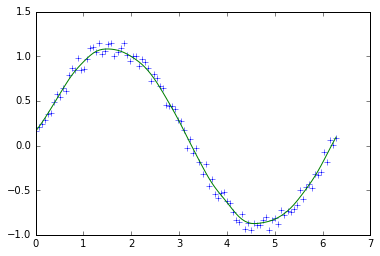

In [20]:
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
# The third parameter specifies the type of the variable x;
# 'c' stands for continuous
kr = KernelReg(y,x,'c')
plt.plot(x, y, '+')
y_pred, y_std = kr.fit(x)
plt.plot(x, y_pred)
plt.show()

# More

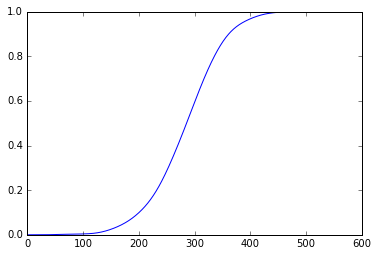

In [10]:
nobs = 300
np.random.seed(1234)  # Seed random generator
data = np.random.normal(size=nobs)
dens = sm.nonparametric.KDEUnivariate(data)
dens.fit()
plt.plot(dens.cdf)
plt.show()

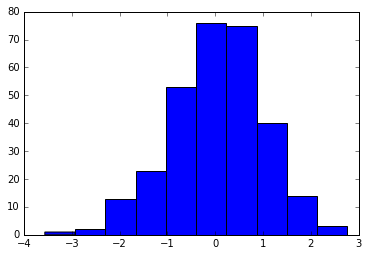

In [12]:
plt.hist(data)
plt.show()